Analisando dados de compras realizadas.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
dados = pd.read_csv("./data/tabela_2021_em_diante.csv")

In [3]:
dados.head()

,_id,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,Latidude,Longitude
0,65820c84fdd8238f42ebd3ac,Impressora,eletronicos,322.04,14.732100,2021-01-01,João Souza,SP,3,cartao_credito,1,-22.19,-48.79
1,65820c84fdd8238f42ebd3b9,Boneca bebê,brinquedos,50.72,3.231792,2023-01-01,Isabella Pereira,SP,4,boleto,1,-22.19,-48.79
2,65820c84fdd8238f42ebd3bb,Pandeiro,instrumentos musicais,47.05,2.788397,2023-01-01,Bianca Santos,RS,5,cartao_credito,6,-30.17,-53.50
3,65820c84fdd8238f42ebd3c9,Jogo de panelas,utilidades domesticas,126.59,4.324976,2021-02-01,Juliana Costa,RS,1,cartao_credito,3,-30.17,-53.50
4,65820c84fdd8238f42ebd3cc,Copo térmico,esporte e lazer,50.31,0.000000,2022-02-01,Beatriz Moraes,RJ,1,cartao_credito,2,-22.25,-42.66


In [4]:
dados.shape

(6574, 13)

In [5]:
dados.columns

Index(['_id', 'Produto', 'Categoria do Produto', 'Preço', 'Frete',
       'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'Latidude', 'Longitude'],
      dtype='object')

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     6574 non-null   object 
 1   Produto                 6574 non-null   object 
 2   Categoria do Produto    6574 non-null   object 
 3   Preço                   6574 non-null   float64
 4   Frete                   6574 non-null   float64
 5   Data da Compra          6574 non-null   object 
 6   Vendedor                6574 non-null   object 
 7   Local da compra         6574 non-null   object 
 8   Avaliação da compra     6574 non-null   int64  
 9   Tipo de pagamento       6574 non-null   object 
 10  Quantidade de parcelas  6574 non-null   int64  
 11  Latidude                6574 non-null   float64
 12  Longitude               6574 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 667.8+ KB


1. Qual a categoria com mais intens vendidos?

In [43]:
itens_vendidos = dados['Categoria do Produto'].value_counts()
itens_vendidos

Categoria do Produto
moveis                   1315
eletronicos              1255
brinquedos                896
eletrodomesticos          784
esporte e lazer           774
instrumentos musicais     542
livros                    509
utilidades domesticas     499
Name: count, dtype: int64

2. Identificar o produto com a maior receita total

In [17]:
receita_por_produto = dados.groupby('Produto')['Preço'].sum()
receita_por_produto.unique

Produto
Assistente virtual              33206.37
Bateria                        146166.11
Bicicleta                       85028.36
Blocos de montar                 6109.41
Bola de basquete                 9032.13
Bola de vôlei                    8332.70
Boneca bebê                      8079.77
Cadeira de escritório           65900.55
Cama box                        98390.41
Cama king                      124667.18
Carrinho controle remoto        12675.13
Celular ABXY                   151518.86
Celular Plus X42               386698.52
Ciência de dados com python      8987.25
Copo térmico                     8496.79
Corda de pular                   2669.70
Cubo mágico 8x8                  2723.63
Cômoda                          56446.60
Dashboards com Power BI          5716.33
Dinossauro Rex                   2645.96
Faqueiro                         7800.22
Fogão                          125451.71
Fone de ouvido                  16199.66
Geladeira                      345323.02
Guarda r

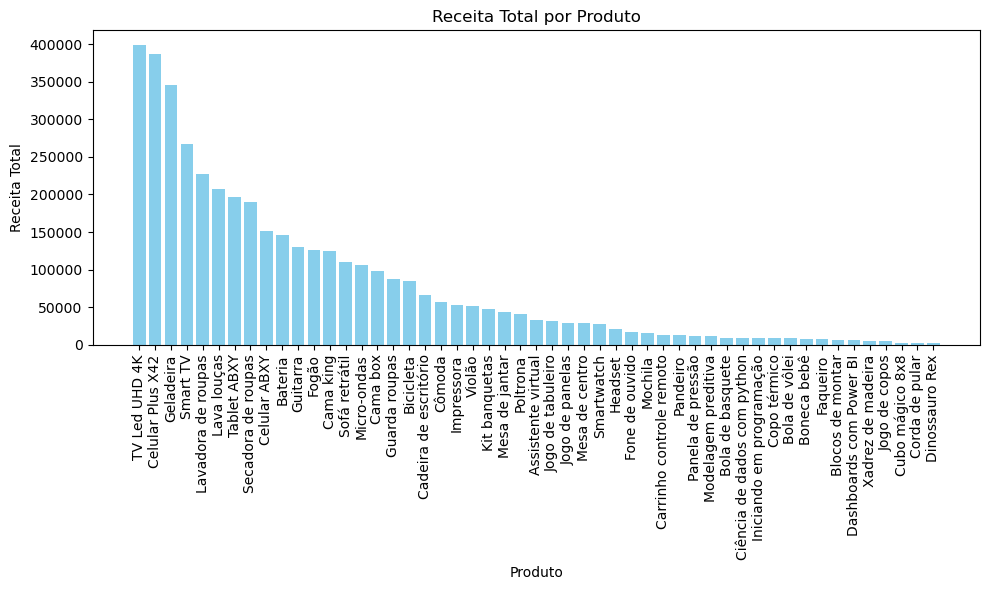

In [20]:
df_receita_por_produto = receita_por_produto.reset_index()
df_receita_por_produto = df_receita_por_produto.sort_values(by='Preço', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df_receita_por_produto['Produto'], df_receita_por_produto['Preço'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Produto')
plt.ylabel('Receita Total')
plt.title('Receita Total por Produto')
plt.tight_layout()
plt.show()


3. Método de pagamento mais utilizado

In [38]:
pagamento = dados['Tipo de pagamento'].value_counts()
pagamento

Tipo de pagamento
cartao_credito    4824
boleto            1310
cupom              355
cartao_debito       85
Name: count, dtype: int64

In [30]:
t1 = pd.DataFrame(pagamento)

In [31]:
t1

,count
Tipo de pagamento,
cartao_credito,4824
boleto,1310
cupom,355
cartao_debito,85


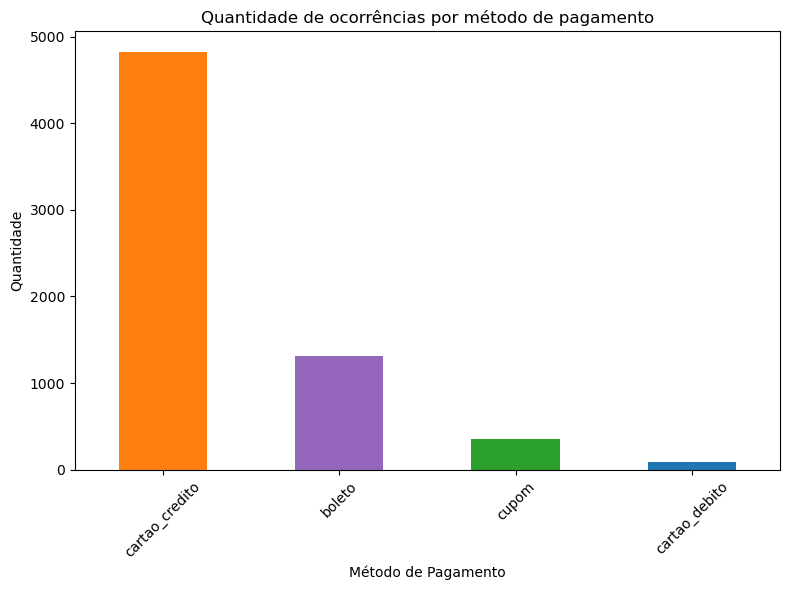

In [36]:
cor_rocket = ['#FF7F0E', '#9467BD', '#2CA02C', '#1F77B4', '#D62728']
plt.figure(figsize=(8, 6))
pagamento.plot(kind='bar', color=cor_rocket)
plt.title('Quantidade de ocorrências por método de pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

4. Qual foi o vendedor com mais vendas?

In [41]:
vendedor = dados['Vendedor'].value_counts()
vendedor

Vendedor
Thiago Silva        531
Felipe Santos       494
Bianca Santos       487
Bruno Rodrigues     483
Mariana Ferreira    473
João Souza          470
Juliana Costa       470
Larissa Alves       469
Camila Ribeiro      463
Beatriz Moraes      459
Isabella Pereira    452
Pedro Gomes         447
Rafael Costa        445
Lucas Oliveira      431
Name: count, dtype: int64

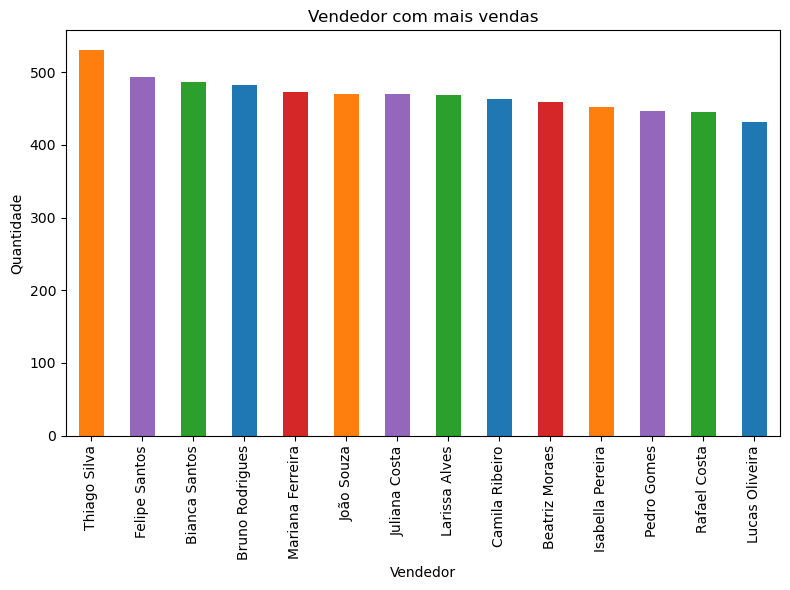

In [44]:
plt.figure(figsize=(8, 6))
vendedor.plot(kind='bar', color=cor_rocket)
plt.title('Vendedor com mais vendas')
plt.xlabel('Vendedor')
plt.ylabel('Quantidade')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

5. Verificando correlacoes entre as variaveis


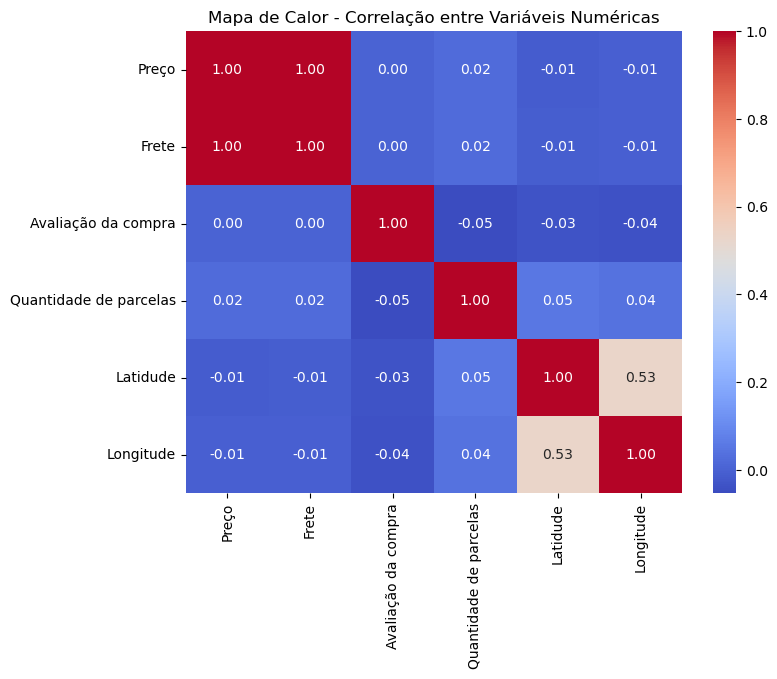

In [49]:
dados_numericos = dados.select_dtypes(include='number')  # Seleciona apenas as colunas numéricas

correlacao_dados = dados_numericos.corr()  # Calcula a matriz de correlação para as colunas numéricas

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_dados, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor - Correlação entre Variáveis Numéricas')
plt.show()